In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
mall=pd.read_csv('mall_customers.csv')

In [ ]:
mall.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#know whether any element is null in the columns
mall.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [ ]:
import warnings #avoiding the red blocks of warnings
warnings.filterwarnings("ignore")

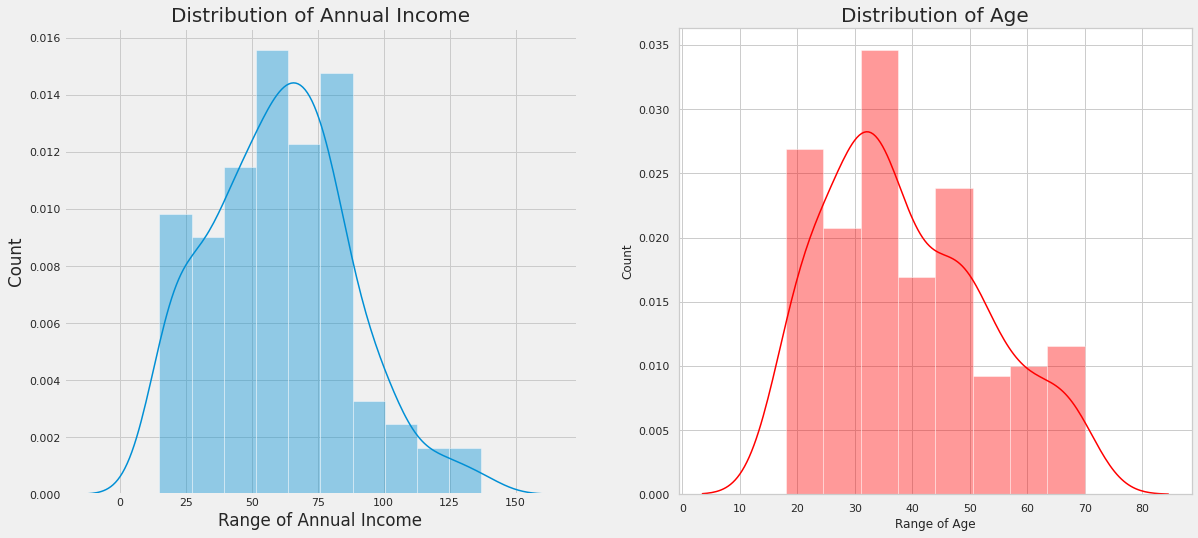

In [ ]:
plt.rcParams['figure.figsize'] = (18, 8) #control the property of figure size for plots

plt.subplot(1, 2, 1) #to draw subplot instances of the same plot on 2 subsets
sns.set(style = 'whitegrid') #to distinguish the chunks of data
sns.distplot(mall['Annual Income (k$)']) #to plot univariate(similar) distribution of observations
plt.title('Distribution of Annual Income', fontsize = 20) #setting title for first graph
plt.xlabel('Range of Annual Income') #label for x axis
plt.ylabel('Count') #label for y axis


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(mall['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

Very few people have their salaries above 100$. Most of the people visiting mall are aged between 20-35.

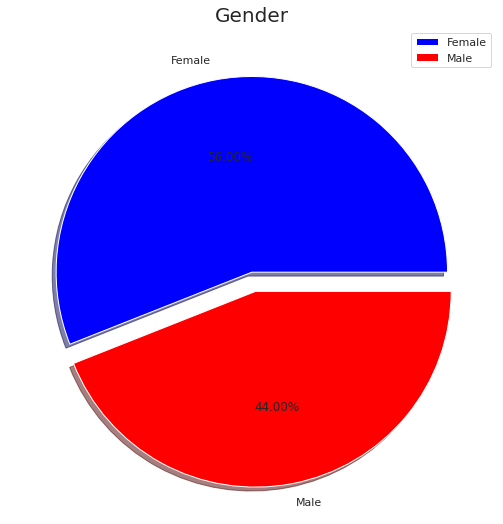

In [ ]:
labels = ['Female', 'Male'] #distinguishing label as male and female customers
size = mall['Gender'].value_counts() #counting female customers
colors = ['blue', 'red'] #plotting blue for female and red for male
explode = [0, 0.1] #both wedges are displayed 0 and 0.1 far from center

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%') #autopct to display the percentage of the each wedge
plt.title('Gender', fontsize = 20)
plt.legend() #add the key to explain the plot 
plt.show()

Comparatively more females visit malls than males.

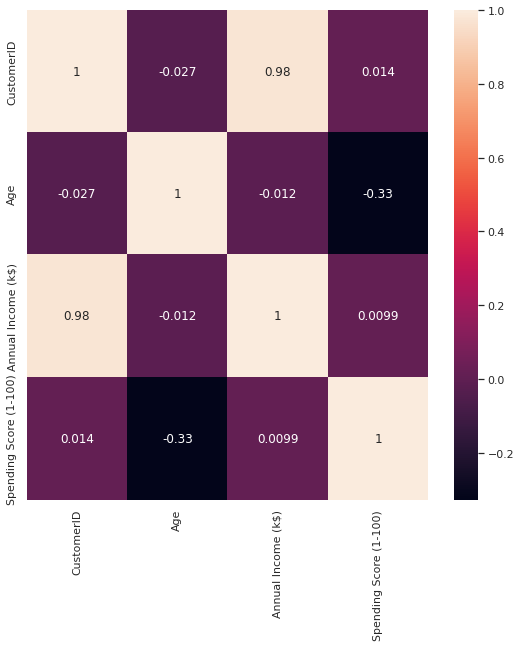

In [ ]:
sns.heatmap(mall.corr(), annot = True) #color-encoded matrix represeting correlation between data with the correlated %age in blocks
plt.show()

None of the features can be eliminated cause everything is related somehow

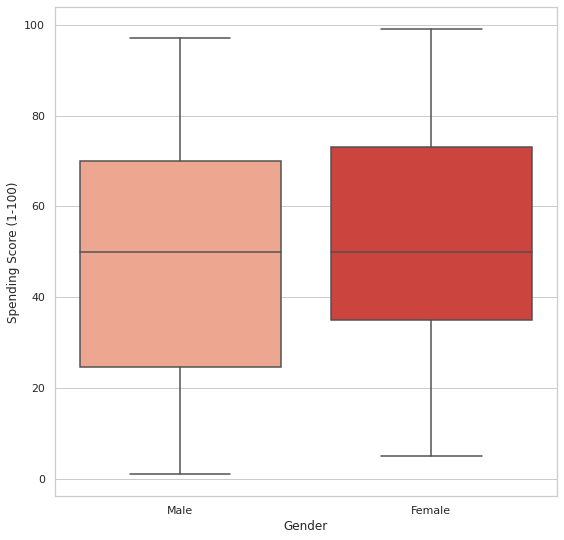

In [ ]:
sns.boxplot(mall['Gender'],mall['Spending Score (1-100)'], palette = 'Reds') #distributions with respect to gender and spending scores

Spending score of females is 35k-75k and males is 25k-70k approx.

Text(0.5, 1.0, 'Gender vs Annual Income (k$)')

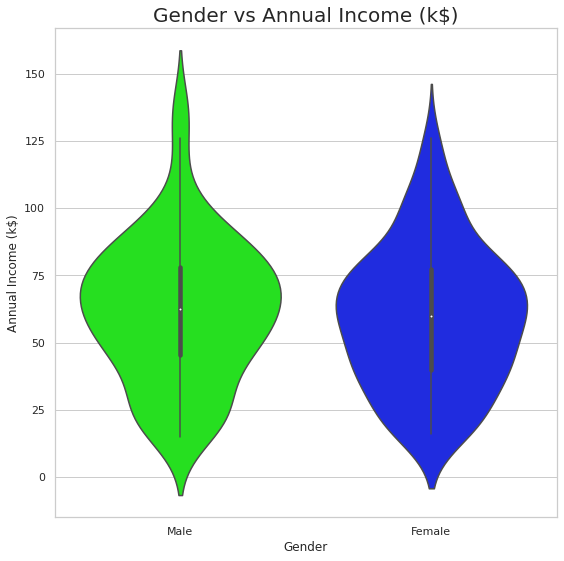

In [ ]:
sns.violinplot(mall['Gender'], mall['Annual Income (k$)'], palette = 'hsv')#kernel density estimation of genders wrt Annual Income
plt.title('Gender vs Annual Income (k$)' ,fontsize = 20)

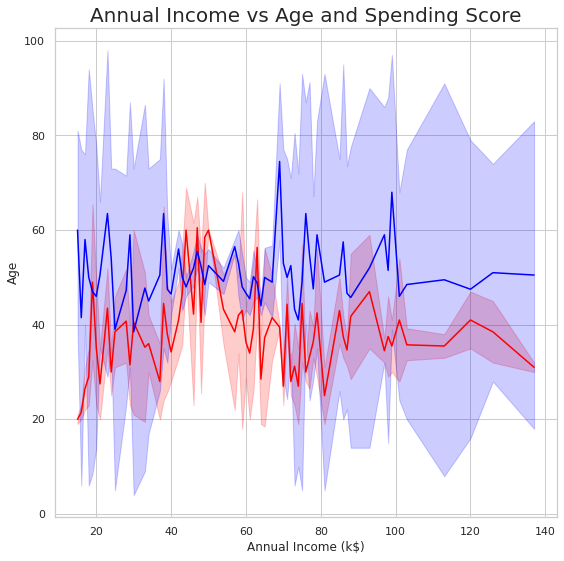

In [ ]:
x = mall['Annual Income (k$)']
y = mall['Age']
z = mall['Spending Score (1-100)']

sns.lineplot(x, y, color = 'red') #visual semantics of relationship between x & y represented by red color
sns.lineplot(x, z, color = 'blue') #visual semantics of relationship between x & z represented by blue color
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

Graph shows how Age and Spending Varies with Annual Income.

# Clustering Analysis

First Approach

In [ ]:
#performing elboew method
from sklearn.cluster import KMeans
sse = []  #sse is sum of square error and then we find k value in range(1-10)
#sse is an array formed
k_rng = range(1,10)
#computing average scores for all clusters for each value of k
for k in k_rng:
    k_mns = KMeans(n_clusters=k)
    k_mns.fit(mall[['Age','Annual Income (k$)']])
    sse.append(k_mns.inertia_)

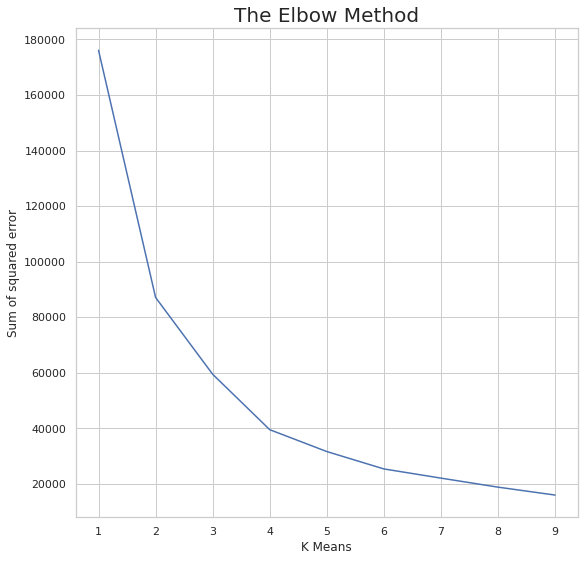

In [ ]:
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('K Means')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [ ]:
#Implement kmeans
kmeans_model = KMeans(n_clusters = 5).fit(mall.iloc[:,3:4])
final=pd.crosstab(mall['Gender'], kmeans_model.labels_)
final

col_0,0,1,2,3,4
Gender,,,,,
Female,13,27,26,18,28
Male,7,15,30,14,22


Second Method

In [ ]:
x = mall.iloc[:, [3, 4]].values
print(x.shape)#shape of x

(200, 2)


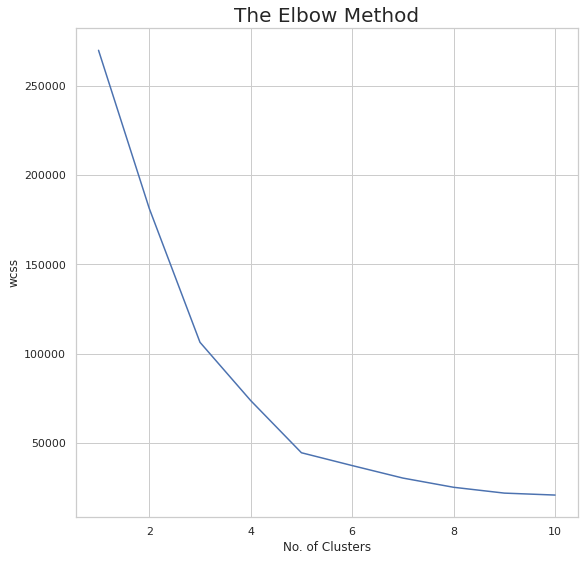

In [ ]:
wcss = [] #sum of squared distance between each point and the centroid in a cluster
for i in range(1, 11):
    k_mns = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    k_mns.fit(x)
    wcss.append(k_mns.inertia_) #appending the distance of points to their closest cluster center
    
plt.plot(range(1, 11), wcss) #setting the range of x wrt wcss
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

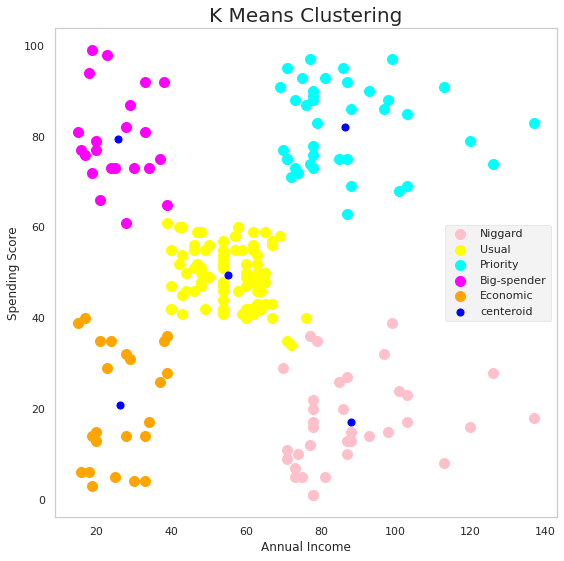

In [ ]:
#Scattering plot to know different segments of customers
k_mns = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)#KMeans++ to choose initial cluster centroids for Clustering
y_means = k_mns.fit_predict(x) #firstly fitting then predicting x

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Niggard')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Usual')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Priority')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Big-spender')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'Economic')
#spreading center points in every cluster to reduce the sum of squares
plt.scatter(k_mns.cluster_centers_[:,0], k_mns.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

This Clustering Analysis gives us a very clear idea about the different segments of the customers in the Mall. There are clearly Five segments of Customers and based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

# Clustering based on Ages

In [ ]:
x = mall.iloc[:, [2, 4]].values
x.shape

(200, 2)

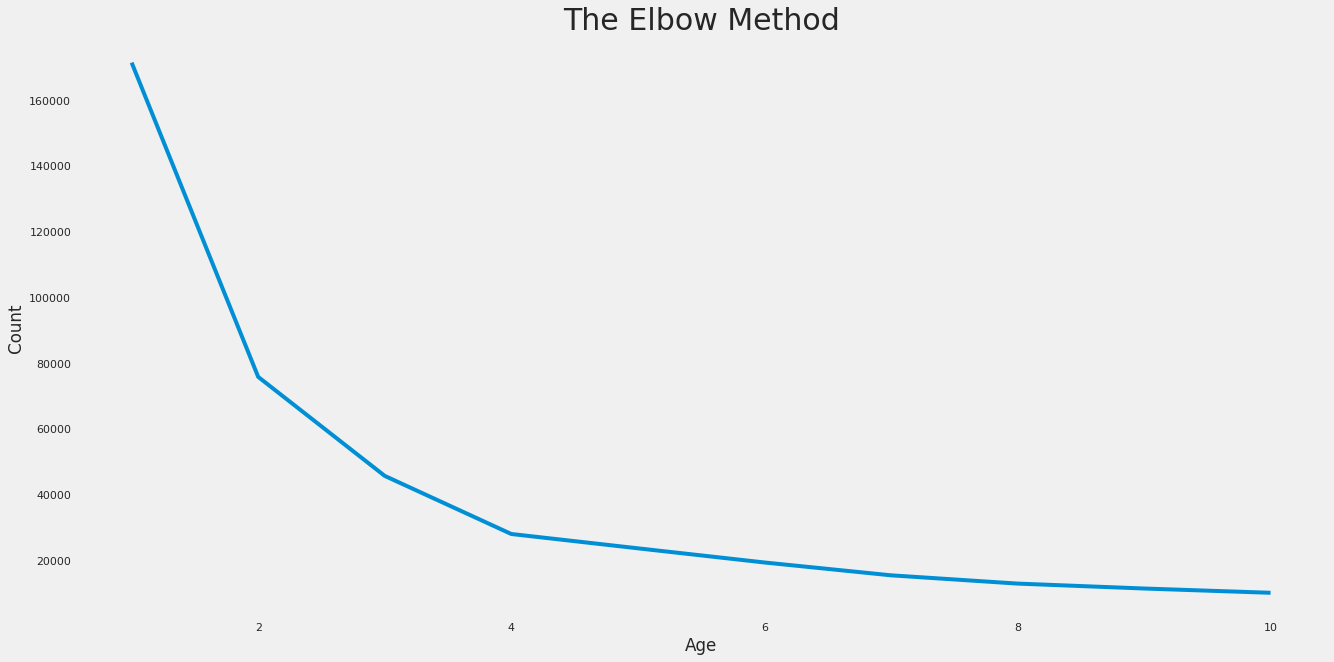

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (20, 10)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

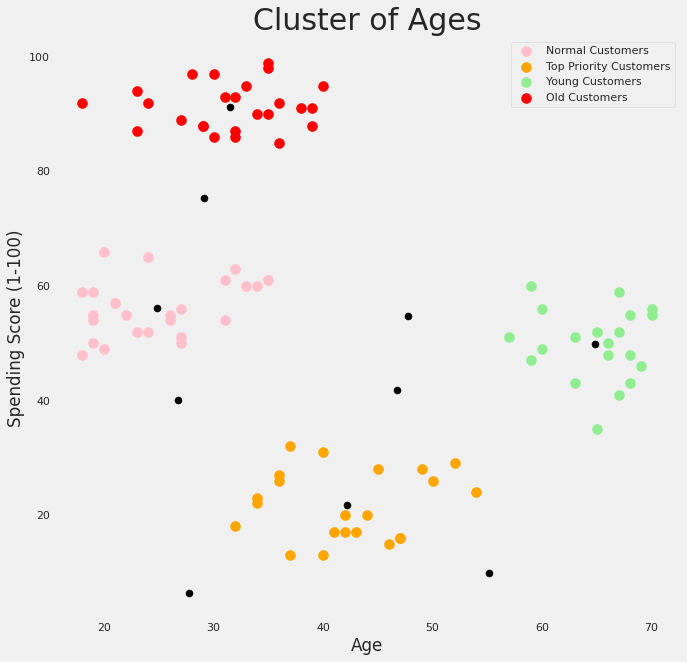

In [ ]:
k_mns = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Normal Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Top Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Young Customers')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Old Customers')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

Seggregated clusters into 4 different categories. After getting the results we can accordingly make different marketing strategies and policies to maximise the revenue by keeping in mind the spending pattern and choices according to age and annual incomes.

# Hierarchial Analysis

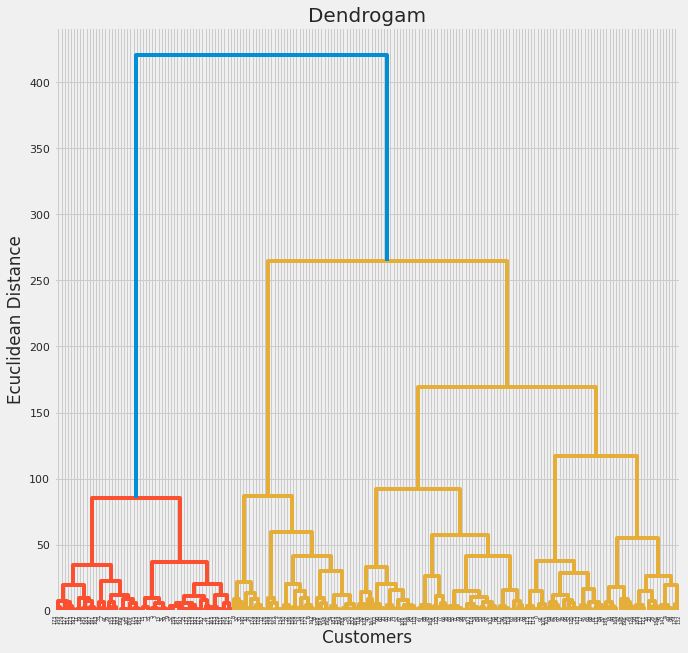

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

Visualizing the Clusters of Hierarchial Clustering

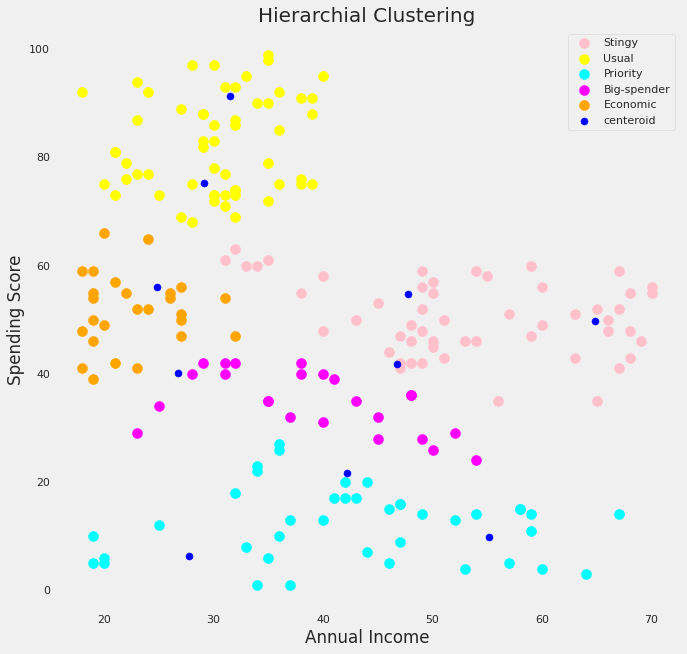

In [ ]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'pink', label = 'Stingy')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'yellow', label = 'Usual')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'cyan', label = 'Priority')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'magenta', label = 'Big-spender')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'orange', label = 'Economic')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('Hierarchial Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

So,here we have clearly segmented customers using attributes. This segmentation can help shop owners target their customers effectively and increase their revenue.